In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_list = !ls ../Submission/NNs/

In [3]:
submission_list = [pd.read_csv('../Submission/NNs/'+m) for m in model_list]

In [4]:
model_list2 = !ls ../Submission/gbms/

In [7]:
submission_list2 = [pd.read_csv('../Submission/gbms/'+m) for m in model_list2]

In [8]:
submission_list = submission_list + submission_list2

In [9]:
predicts = [s.time_to_failure.values for s in submission_list]

In [10]:
submission = pd.read_csv('../Data/sample_submission.csv')

In [13]:
submission.time_to_failure = np.median(np.stack(predicts,1),1)
submission.to_csv('../Submission/'+'Median_NNs_gbms'+'.csv',index=False)

In [15]:
submission.time_to_failure = np.mean(np.stack(predicts,1),1)
submission.to_csv('../Submission/'+'Mean_NNs_gbms'+'.csv',index=False)

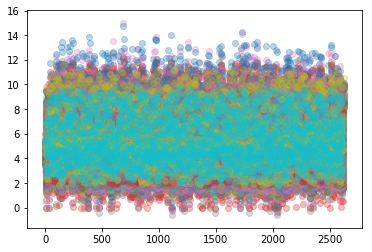

In [16]:
for i in range(len(submission_list)):
    plt.scatter(np.arange(predicts[0].shape[0]), predicts[i],alpha=0.3)
    #plt.show()

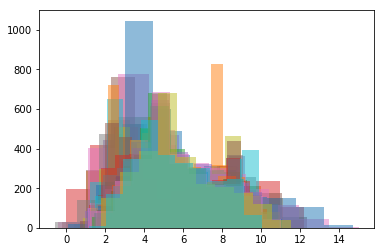

In [17]:
for i in range(len(submission_list)):
    plt.hist(predicts[i],alpha=0.5)

In [18]:
corrMatrix = np.corrcoef(np.stack(predicts,1),rowvar=False)

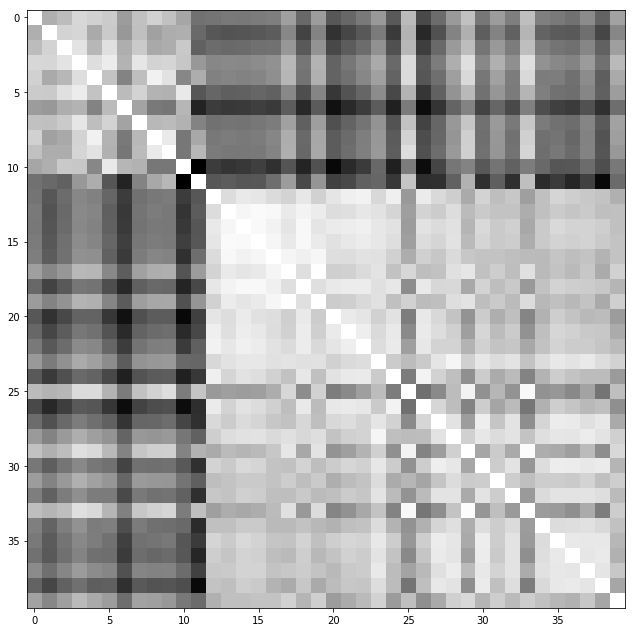

In [24]:
figure(figsize = (11,11))
plt.imshow(corrMatrix,cmap='gray')
#fig, ax = plt.subplots()
#im = ax.imshow(corrMatrix,cmap='gray')
#fig.colorbar(im)